In [52]:
import pandas as pd

pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_rows', 6)
pd.set_option('precision', 2)

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
import math

In [22]:
lq_df_ = pd.read_excel('res/csi800.daily.close.xlsx', index_col=0)

In [23]:
lq_df_.index

Index(['000060 CH', '000059 CH', '000408 CH', '000422 CH', '000426 CH',
       '000488 CH', '000506 CH', '000510 CH', '000525 CH', '000420 CH',
       ...
       '600677 CH', '600850 CH', '600756 CH', '603019 CH', '603160 CH',
       '603260 CH', '603005 CH', '603444 CH', '603501 CH', '603528 CH'],
      dtype='object', name=0.9994263029184945, length=1329)

In [120]:
symbol = '000408'
assert symbol+' CH' in lq_df_.index

In [121]:
lq_df = lq_df_[lq_df_.index == f'{symbol} CH'].T
lq_df.drop(index=['PX_LAST'], inplace=True)
lq_df.index = lq_df.index.map(lambda x: pd.to_datetime(x))

In [122]:
my_df=pd.read_csv('res/t0625-get_CSI800_unique_daily_history/'+symbol+'.csv',index_col='trade_date',parse_dates=True)



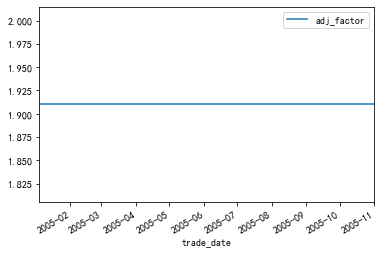

'000408'

In [123]:
my_df.loc['2005-01-04':'2005-11-01',['adj_factor']].plot()
plt.show()
symbol

In [124]:
def show(start_date,end_date):
    ax1=plt.subplot(211)
    show_lq_df=lq_df.loc[start_date:end_date,:]
    show_my_df=my_df.loc[start_date:end_date,:]
    show_my_df['close'].plot(label='my_df')
    show_lq_df[f'{symbol} CH'].plot(label='target_df')
    plt.legend()
    plt.setp(ax1.get_xticklabels(), fontsize=6)
    
    ax2=plt.subplot(212,sharex=ax1)
    
    adj_divides=show_my_df[['adj_factor']]

    adj_divides['divide']=[c1/c2 if not math.isnan(c1/c2) else 0 for c1,c2 in zip(show_lq_df[f'{symbol} CH'].values,show_my_df['close'].values) ]
    adj_divides.plot(ax=ax2)
    
    plt.legend()
    plt.show()


e:\python\envs\py36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


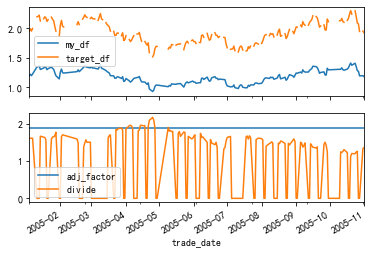

In [125]:
show('2005-01-04','2005-11-01')

e:\python\envs\py36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


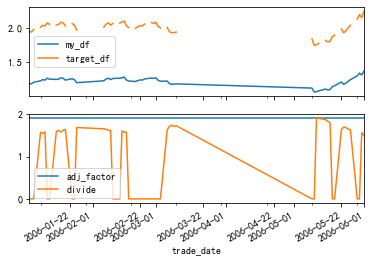

In [128]:
show('2006-01-01','2006-06-01')

e:\python\envs\py36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


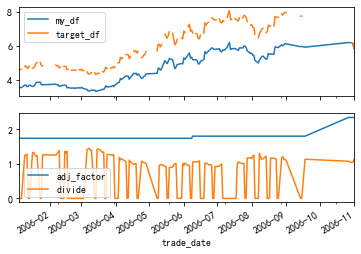

In [77]:
show('2006-01-01','2006-11-01')

e:\python\envs\py36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


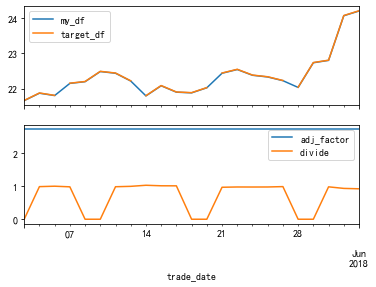

In [75]:
show('2018-05-01','2018-06-01')

In [79]:
def show_adjust(start_date,end_date):
    d1=lq_df.loc[start_date:end_date,'000060 CH']
    d2=my_df.loc[start_date:end_date,'close']
    m=dict([(c2,c1/c2) for c1,c2 in zip(d1.values,d2.values) if not math.isnan(c1/c2)])
#     p=sum(m)/len(m)
    m
    
    show_lq_df=lq_df.loc[start_date:end_date,:]
    show_my_df=my_df.loc[start_date:end_date,:]
    show_my_df['close'].map(lambda x:x*m[x]).plot(label='my_df')
    show_lq_df['000060 CH'].plot(label='target_df')

    plt.legend()
    plt.show()

In [80]:
show_adjust('2005-05-01','2005-06-01')

KeyError: 0.7075